# Домашняя работа 1
## В данном задании мы будем сжимать звуковую дорожку при помощи алгоритма PCA
### Выполнил: Просеков Алексей (PROSEKOV-AV)

In [ ]:
import os
# Понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# Это нужно для проигрывания аудио файлов прямо в блокноте
from IPython.display import Audio

# А это набор для этого задания
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd

import scipy as sp
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

In [ ]:
# Настроим библиотеки отрисовки
%matplotlib inline

sns.set(font_scale=1.3)

red   = '#FF3300'
blue  = '#0099CC'
green = '#00CC66'

In [ ]:
# Скачаем данные
! wget https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav

--2023-09-02 17:28:09--  https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav [following]
--2023-09-02 17:28:09--  https://www.dropbox.com/s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5399db6b601c225e9844093dbf.dl.dropboxusercontent.com/cd/0/inline/CC844EUQ98RMBOCIdk-qB71WdW4Ba8LzsKpKgM9tMPAxffd0QVSLEJcuJHBCFvts-Kw60jlYM8oHU7eFhGAsArIT9cXB7XV1htQT0XC_Mwf7SeDuEzg3Z2-B8CJk6hIzbbgKn_QU1qEHK6oSIHWkaINH/file# [following]
--2023-09-02 17:28:09--  https://uc5399db6b601c225e9844093dbf

In [ ]:
# Прочитаем аудио дорожку при помощи wavfile
samplerate, data = wavfile.read('Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')

`samplerate` есть частота дискретизации - стандартное для аудио значние -- 44100 Гц.

NOTE: **Частота дискретизации** говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука [тут](https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации).

In [ ]:
data.shape

(1990656, 2)

In [ ]:
print(data)

[[ 0  0]
 [-1 -1]
 [-1 -1]
 ...
 [ 0  0]
 [ 0  0]
 [ 0  0]]


In [ ]:
# Посмотрим какая у нас частота диспретезации
print(samplerate)

44100


In [ ]:
# Если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

print(len(data) / samplerate)

# 45 секунд - похоже на правду:)

45.139591836734695


In [ ]:
# Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

print(data.shape)

(1990656, 2)


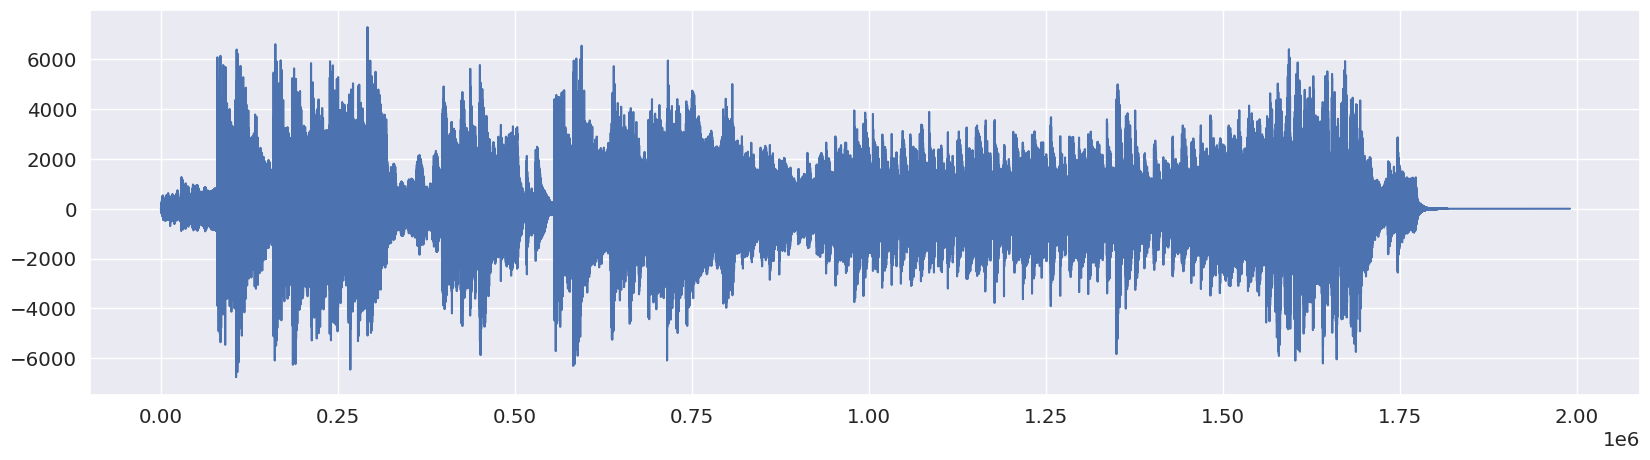

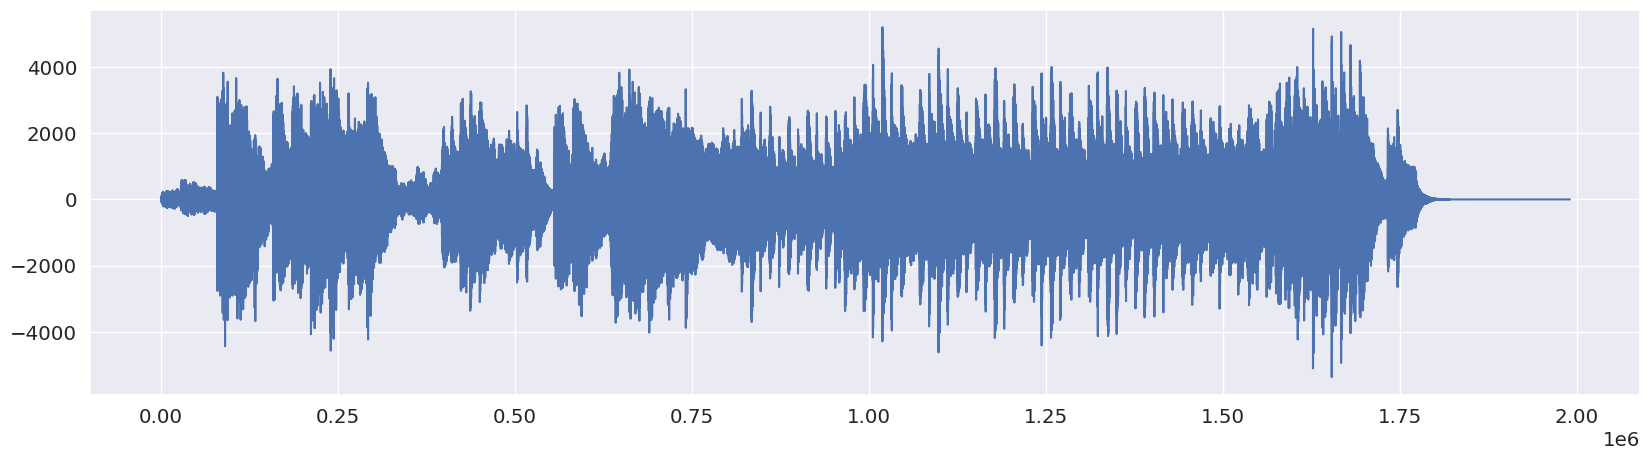

In [ ]:
# Отрисуем сигналы в обоих каналах

# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()

# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

In [ ]:
# Усредним каналы, и получим моно звук, с которым будет проще работать

mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


In [ ]:
# Давайте послушаем наконец, что же мы будем сжимать:)

Audio(mono_sound, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами.
# На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки, только здесь задача еще проще)

mono_sound_to_cut = mono_sound[:1990000]

In [ ]:
# Проверим, что наш звук теперь это просто вектор числел

print(mono_sound_to_cut.shape)

(1990000,)


In [ ]:

print(mono_sound_to_cut)

[ 0. -1. -1. ...  0.  0.  0.]


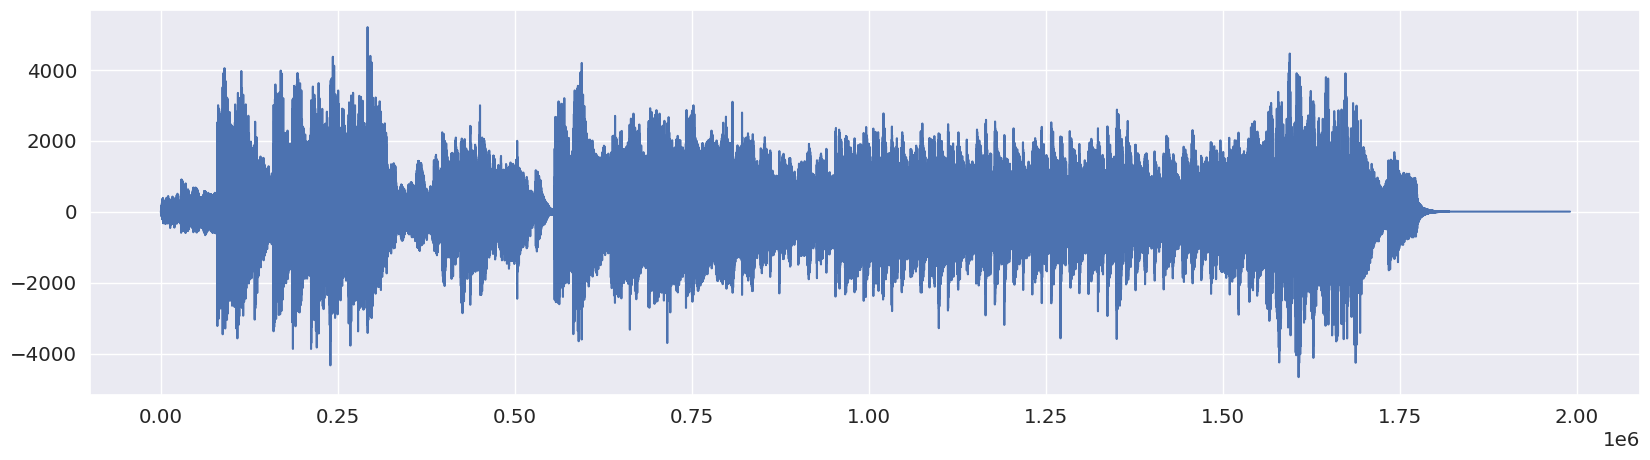

In [ ]:
# Отрисуем сигнал монозвук с усреднением по каналам размером (1990000,)

# Канал 1
plt.figure(figsize=(20,5))
plt.plot(mono_sound_to_cut)
plt.show()

#### Задание 1:

**Подсказка:** В это задании нужно всего лишь вспомнить как пользоваться методом `.reshape()`


1. Разделите сигнал на равные части (длину каждой части возьмите равной 1000) и соберите из них "датасет", который будет представлять из себя двухменый массив - "матрицу", в которой каждая часть сигнала длины 1000 находится в отдельной строке).

    То есть первая часть содержит первые 1000 чисел сигнала и находится в первой строке матрицы, вторая часть следующие 1000 чисел сигнала и находится во второй строке матрицы и так далее.

    Это также как мы делали с кусочками картинки и получали матрицу размера `(24, 1152000)`!

In [ ]:
print(len(mono_sound_to_cut))

1990000


In [ ]:
# Ваше решение здесь
mono_sound_to_cut_1 = mono_sound_to_cut.reshape(1990,1000)

In [ ]:
# Проверим размерность просто вектор числел

print(mono_sound_to_cut_1.shape)

(1990, 1000)


In [ ]:
mono_sound_to_cut_1

array([[  0. ,  -1. ,  -1. , ...,  88.5,  58.5,  18. ],
       [-25.5, -61.5, -81.5, ...,  30.5, -20.5, -53. ],
       [-67.5, -65.5, -50. , ..., 118.5, 118.5,  86.5],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [ ]:
# можно так
X1 = mono_sound_to_cut.reshape(-1,1000)
X1.shape

(1990, 1000)

In [ ]:
X1

array([[  0. ,  -1. ,  -1. , ...,  88.5,  58.5,  18. ],
       [-25.5, -61.5, -81.5, ...,  30.5, -20.5, -53. ],
       [-67.5, -65.5, -50. , ..., 118.5, 118.5,  86.5],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

2. Напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал, то есть разворачивать данные обратно из матрицы размера `(число объектов, 1000)` в вектор длины `(число объектов * 1000)`. Проверьте, что все работает верно, путем воспроизведения "востановленного" сигнала -- он должен совпасть в точности с изначальным (ведь им на самом деле и является).

In [ ]:
# Ваше решение здесь
mono_sound_1 = mono_sound_to_cut_1.reshape(1990000,)
print(mono_sound_1.shape)

(1990000,)


In [ ]:
X2 = X1.reshape(-1)
print(X2.shape)

(1990000,)


In [ ]:
print(mono_sound_1)

[ 0. -1. -1. ...  0.  0.  0.]


In [ ]:
# Давайте послушаем

Audio(mono_sound_1, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Audio(X2, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

#### Задание 2

Подсказка: код этого пункта практически полностью совпадает с кодом, который мы использовали на семинаре.

1. Выполните PCA преобразование нашей матрицы, и получите данные, сжатые в пространство меньшей размерности.

    На этом этапе у нас есть наш "датасет" с 1000 "признаками" и мы хотим уменьшить число "признаков" путем применения метода PCA. Число компонент предлагается выбрать вам, но для начала не стоит брать слишком маленькое число, чтобы потом было проще понять, в случае плохого результата -- компонент оказалось недостаточно или вы где-то ошиблись:)


In [ ]:
X = mono_sound_to_cut_1
print(X)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]


In [ ]:
X.shape

(1990, 1000)

In [ ]:
# Создадим объект класса PCA с числом компонент, равным 1000
pca = PCA(n_components=1000)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
Y.shape


(1990, 1000)

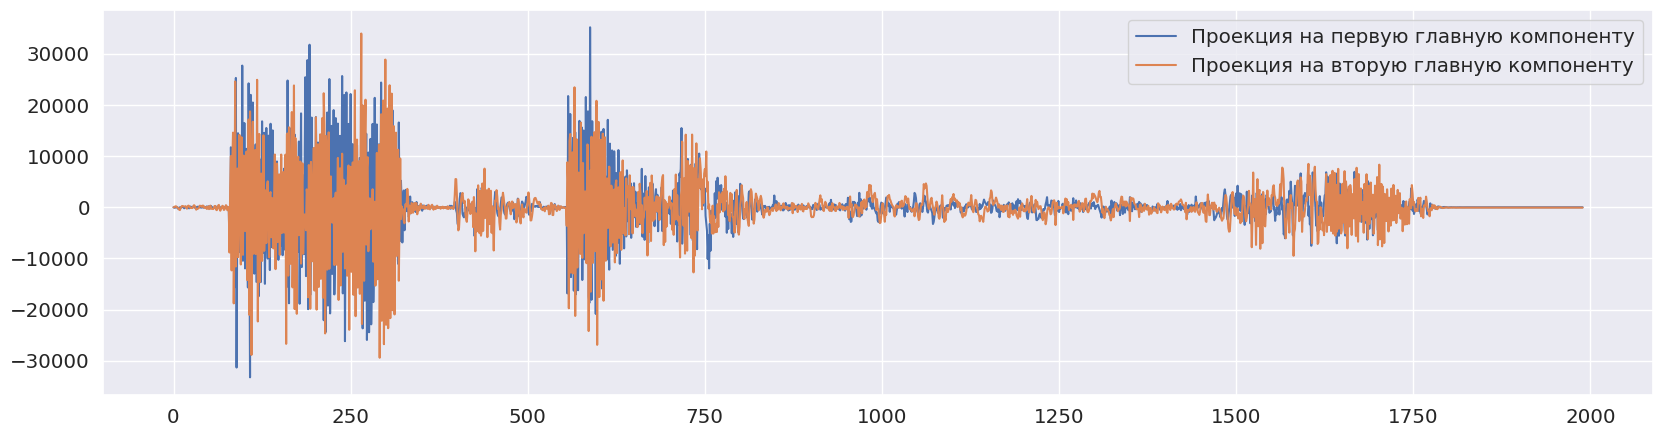

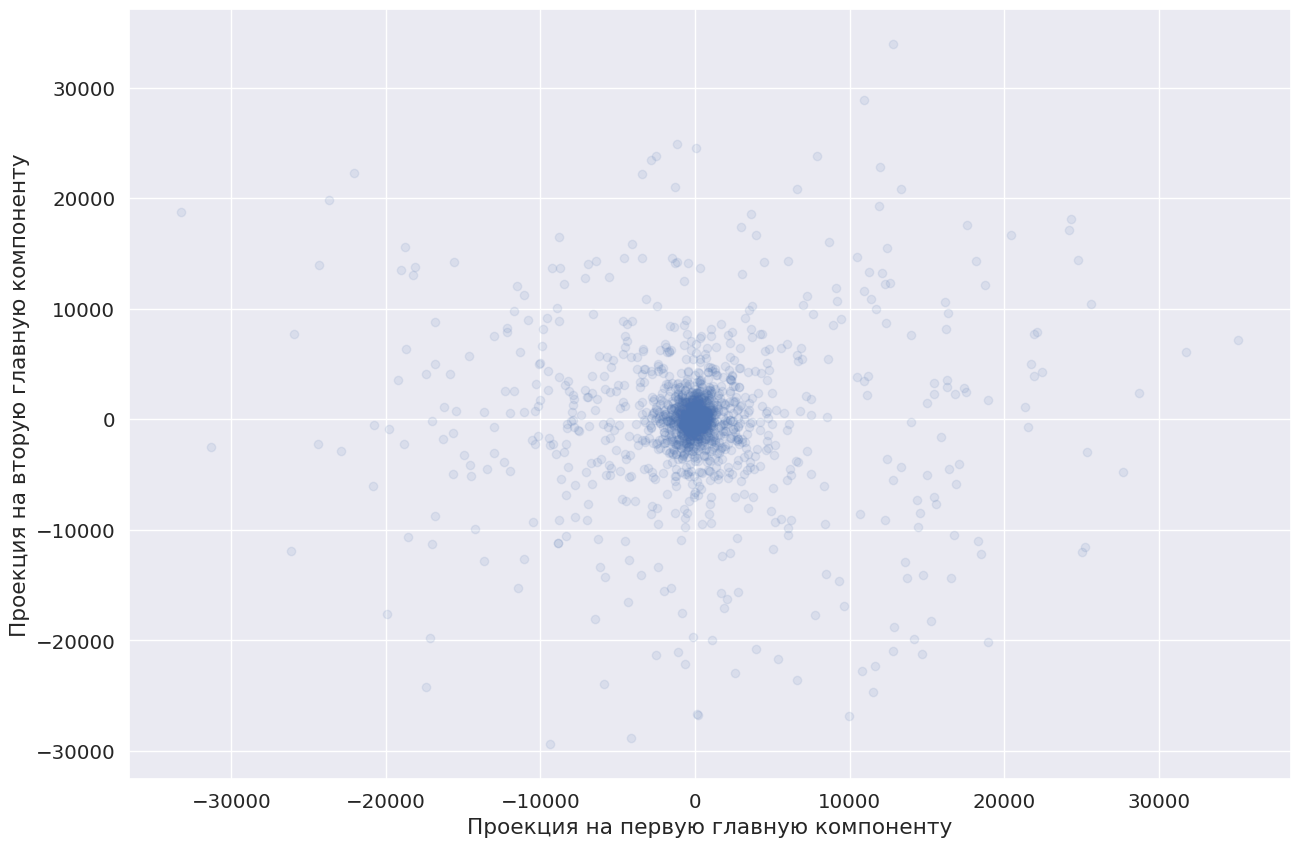

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

Построим следующие графики:

* На первом графике синим отмечены исходные точки, красным - они же после проецирования и обратного преобразования.

* На втором графике точки, спроецированные на главную компоненту в одномерном пространстве (распределение точек вдоль главной компоненты).

# Создадим объект класса PCA с числом компонент, равным 500
# (уменьшили количество признаков в 2 раза)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 500)
(1990, 1000)


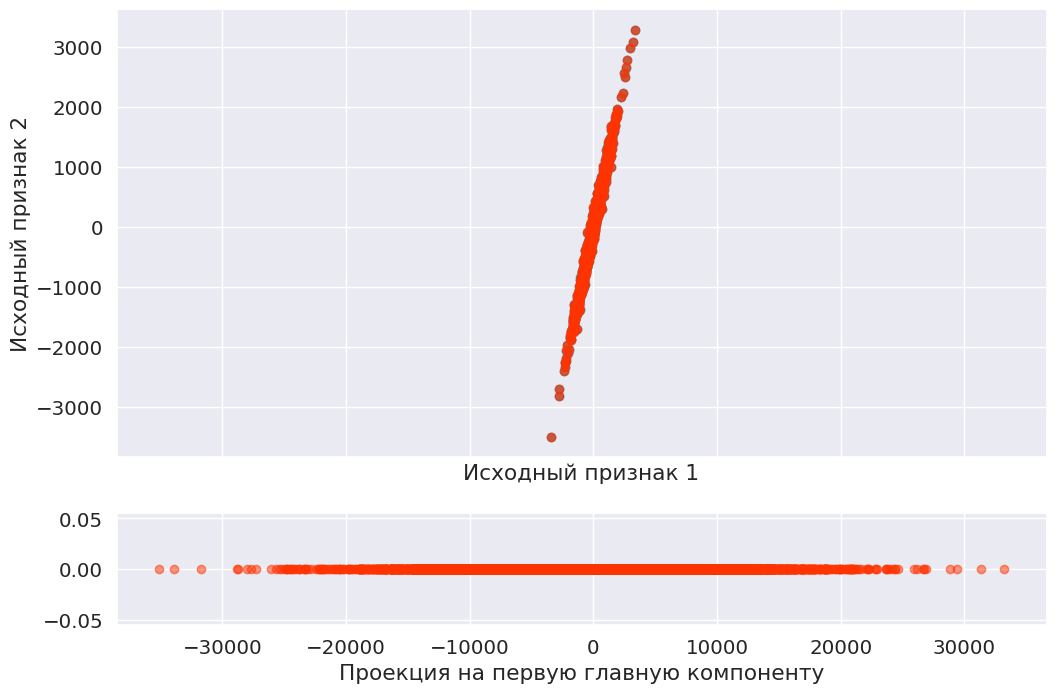

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 500 (уменьшили количество признаков в 2 раз)
pca = PCA(n_components=500)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=500
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y

axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()


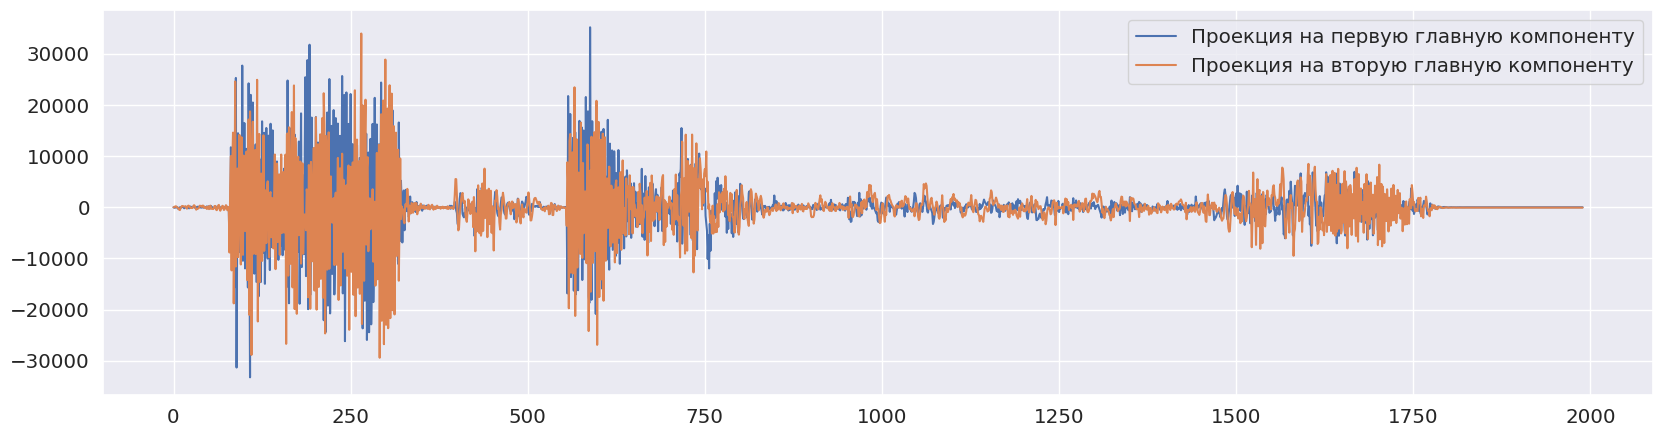

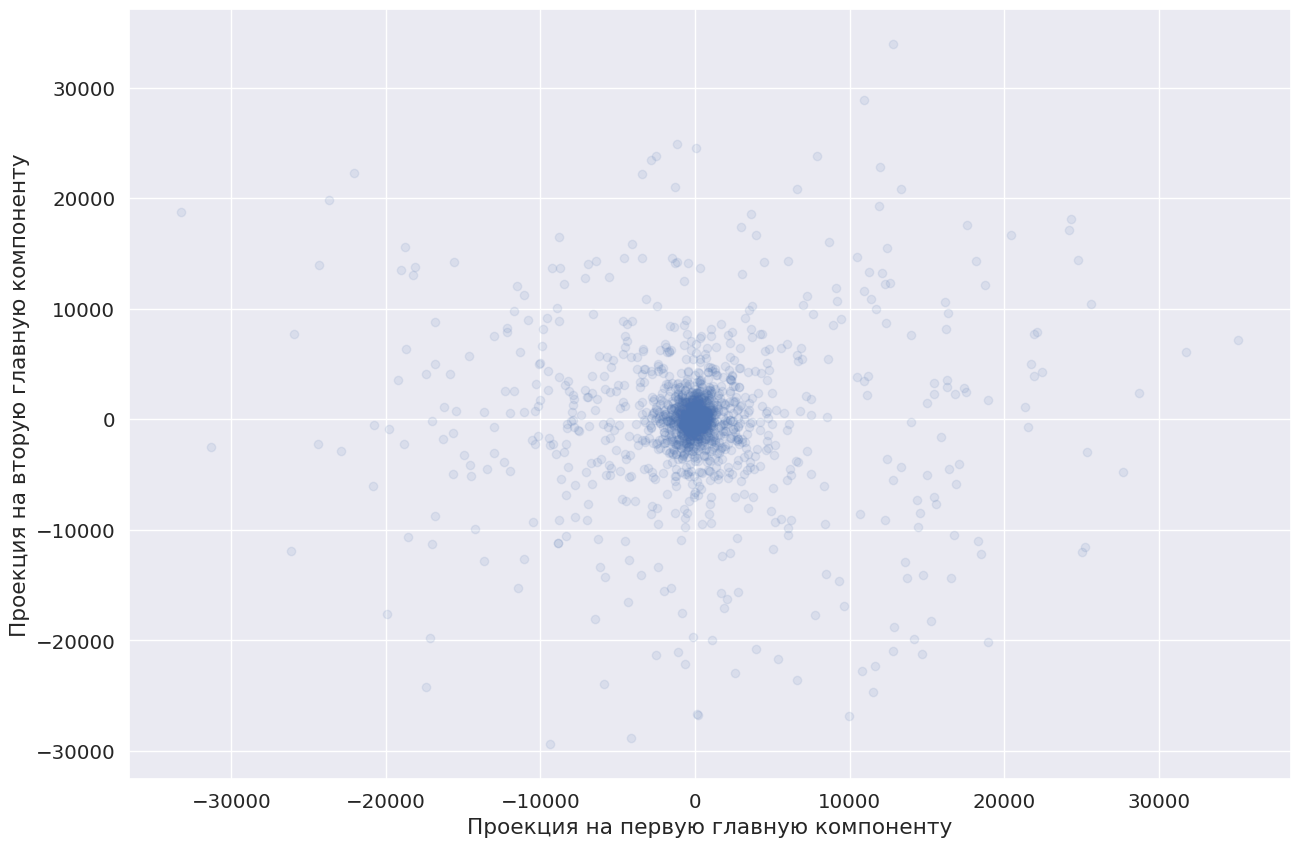

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

#Создадим объект класса PCA с числом компонент, равным 250
# (уменьшили количество признаков в 4 раза)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 250)
(1990, 1000)


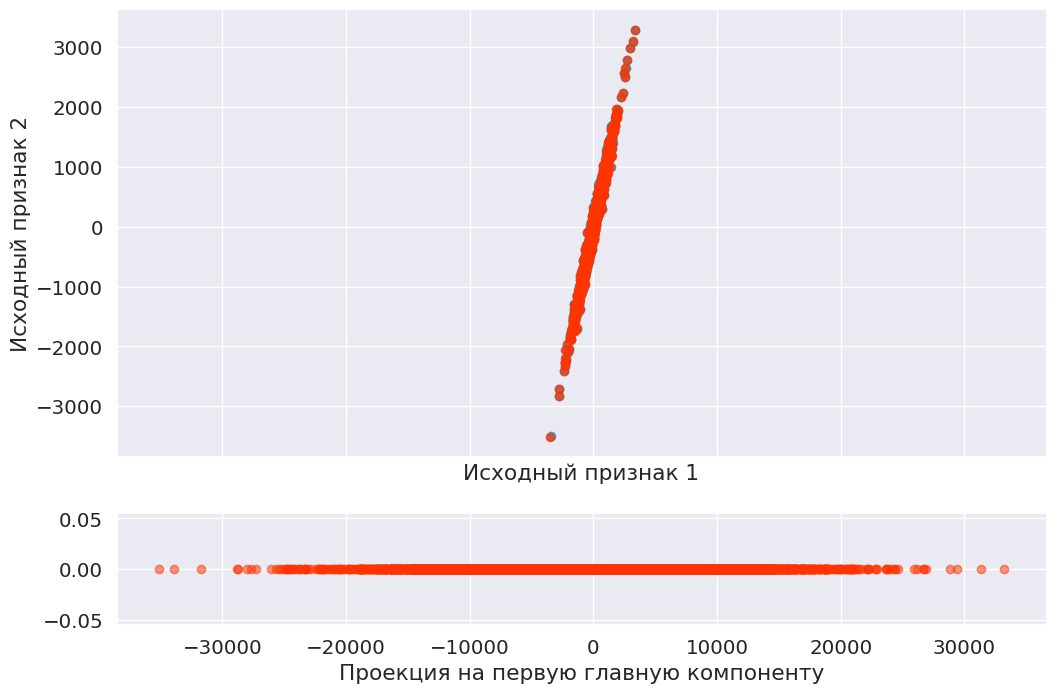

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 250 (уменьшили количество признаков в 4 раза)
pca = PCA(n_components=250)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=250
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y

axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

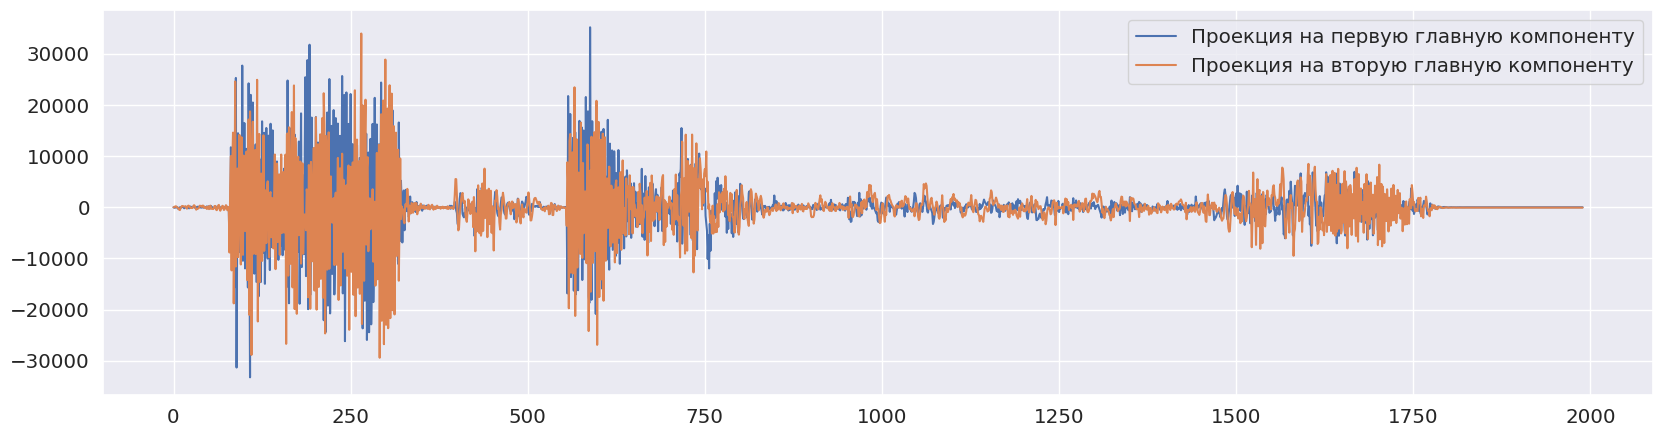

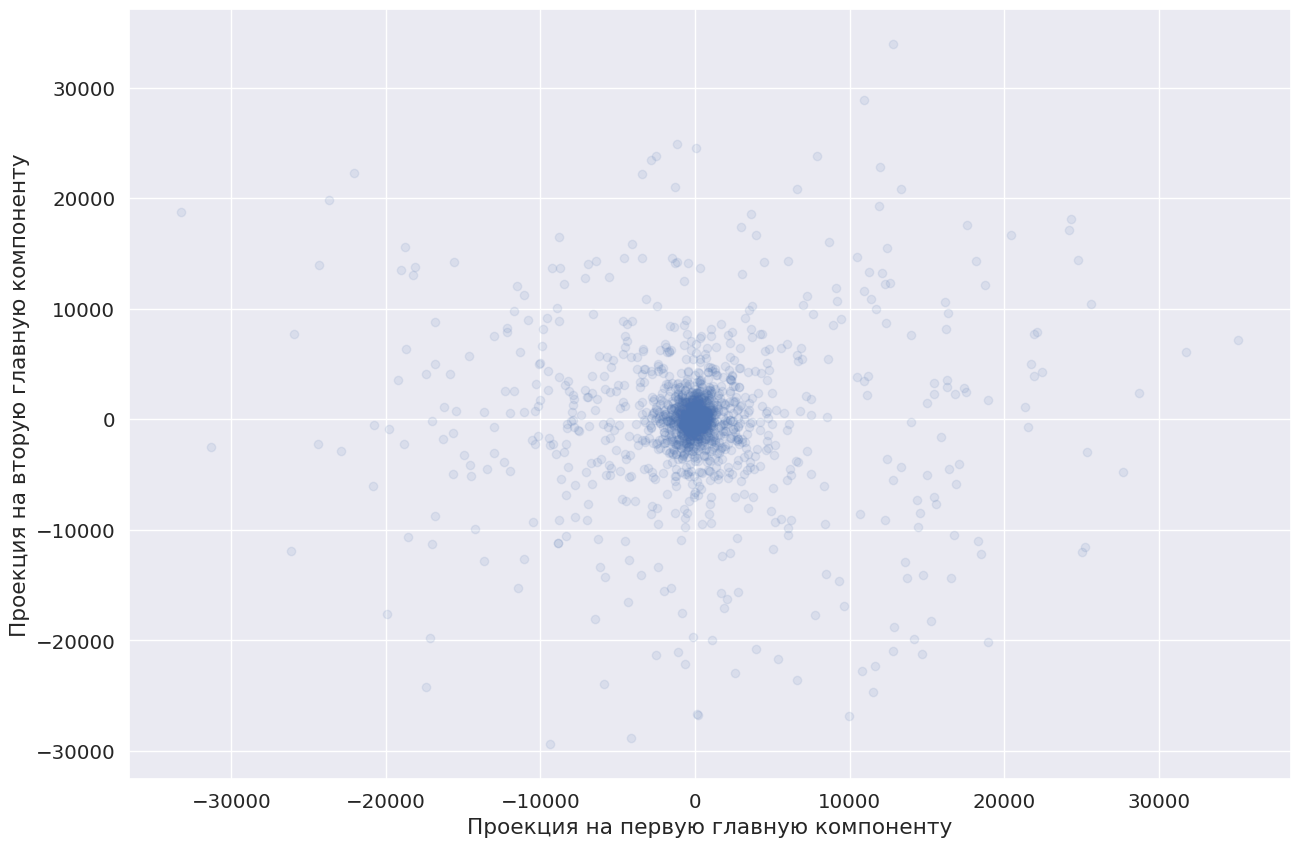

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

# Создадим объект класса PCA с числом компонент, равным 200
# (уменьшили количество признаков в 5 раз)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 200)
(1990, 1000)


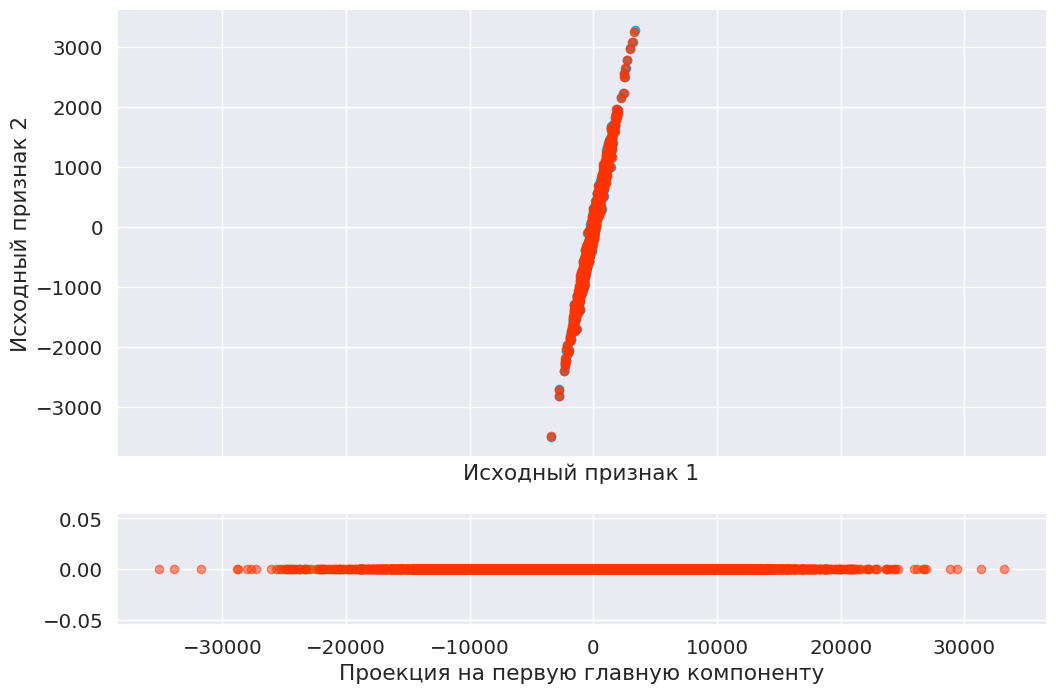

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 200 (уменьшили количество признаков в 5 раз)
pca = PCA(n_components=200)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=200
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y

axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

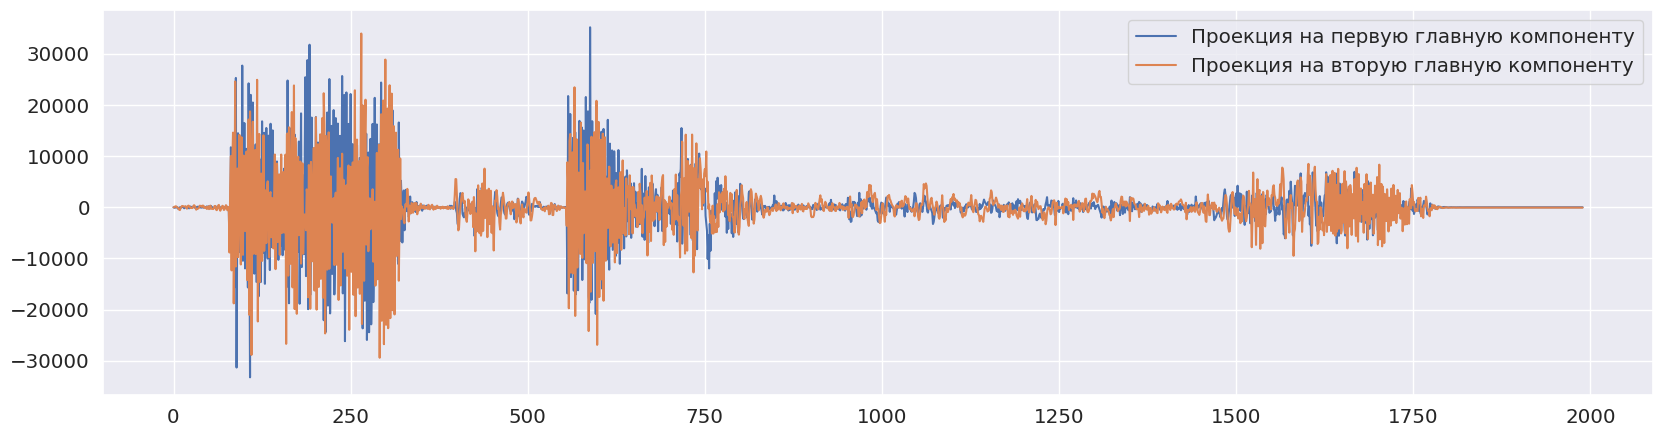

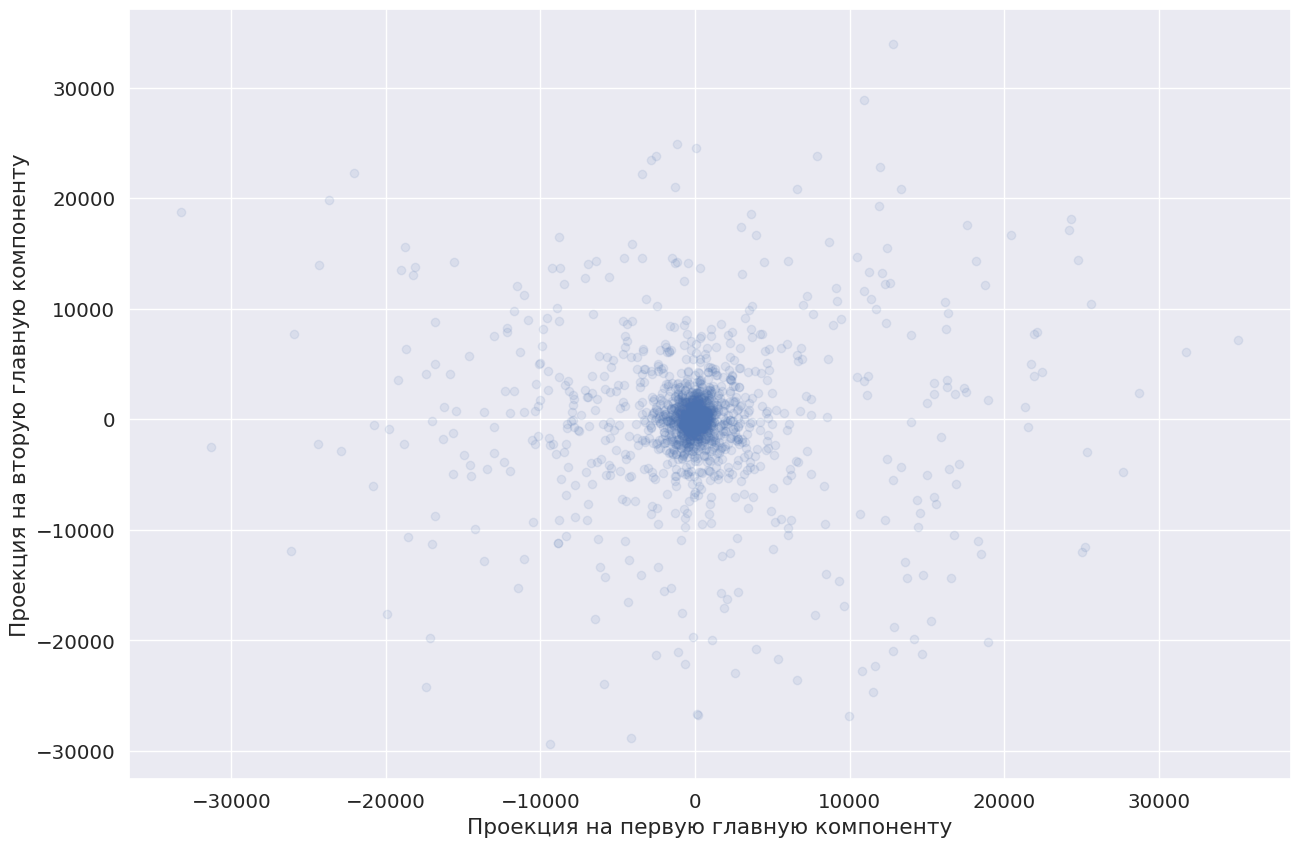

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

#Создадим объект класса PCA с числом компонент, равным 100
# (уменьшили количество признаков в 10 раз)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 100)
(1990, 1000)


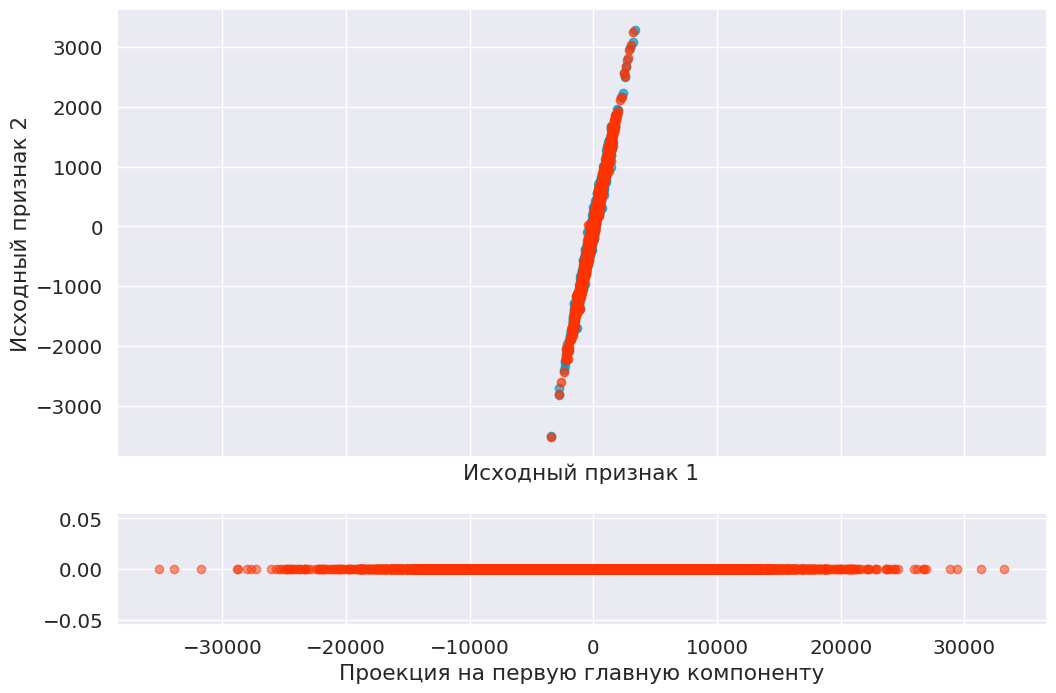

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 100 (уменьшили количество признаков в 10 раз)
pca = PCA(n_components=100)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=100
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y

axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

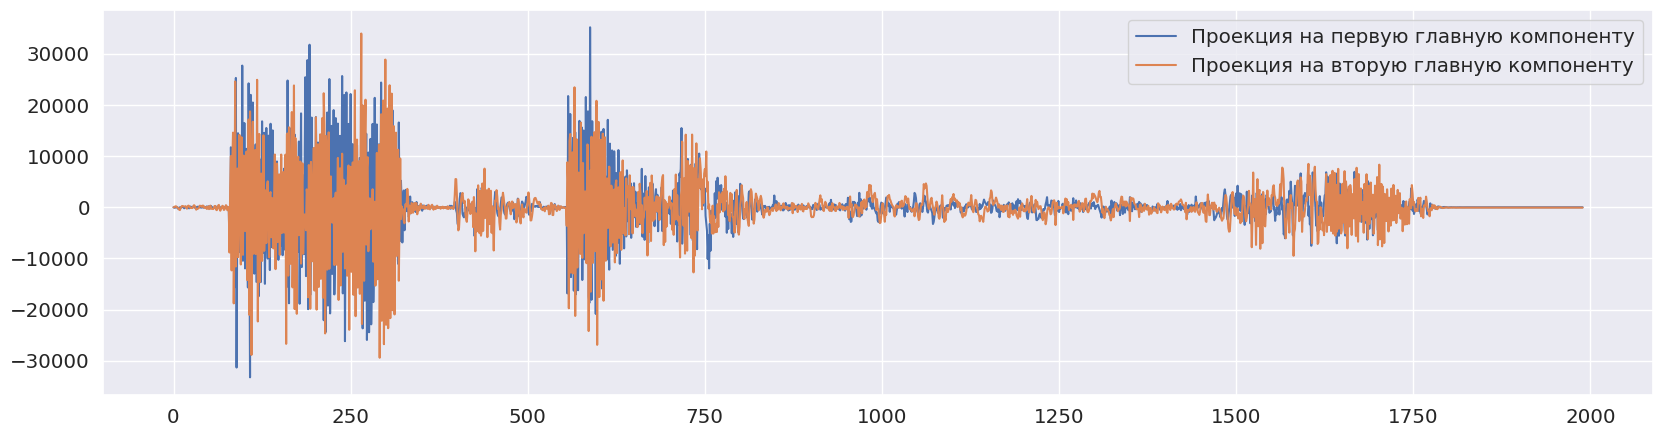

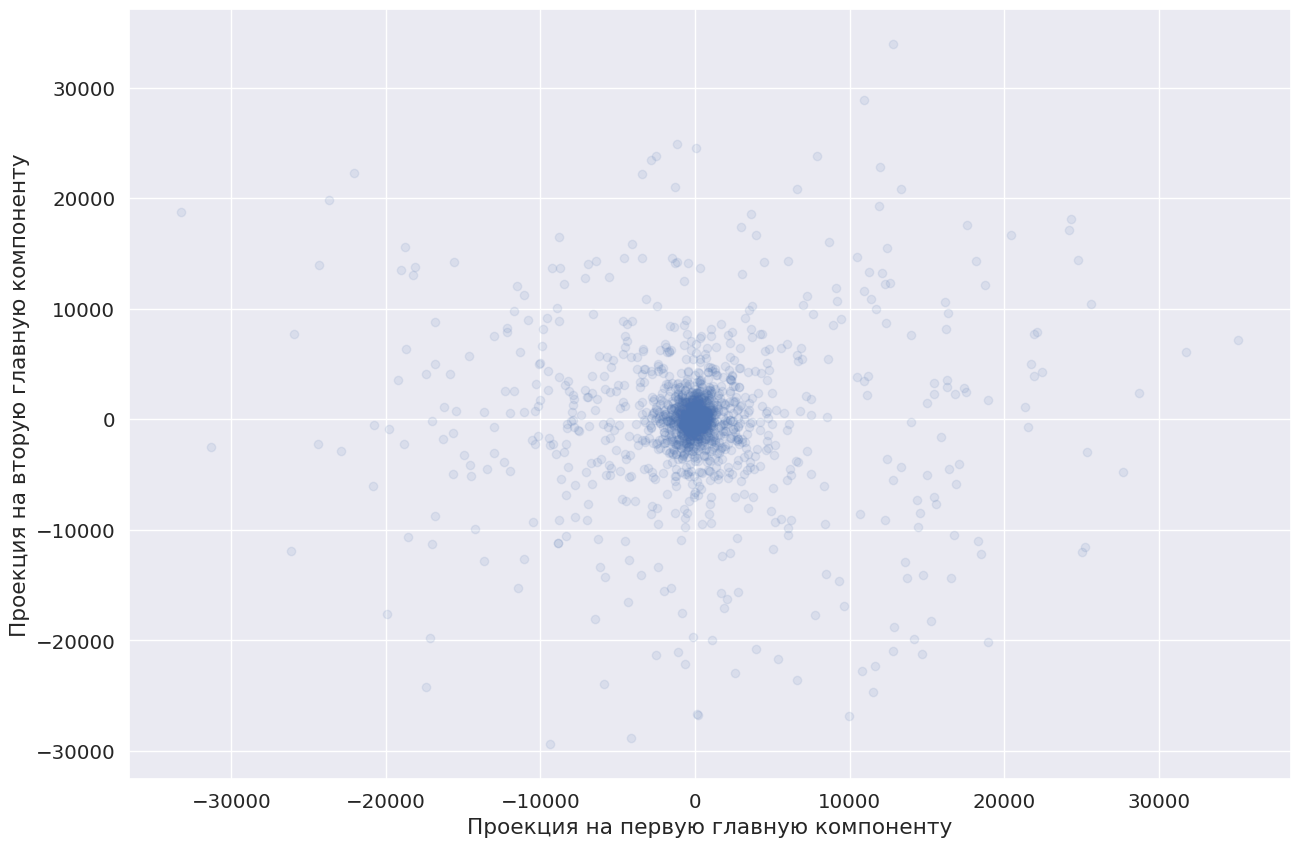

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

#Создадим объект класса PCA с числом компонент, равным 50
# (уменьшили количество признаков в 20 раз)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 20)
(1990, 1000)


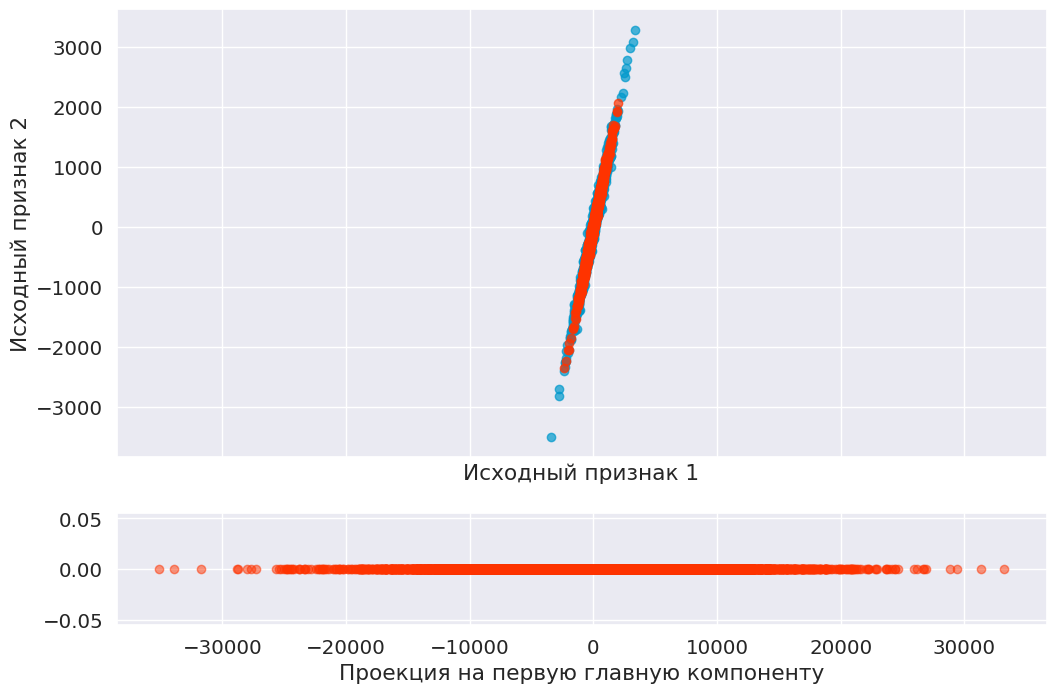

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 20 (уменьшили количество признаков в 20 раз)
pca = PCA(n_components=20)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=20
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y
# (подумайте почему в нашем случае -Y, а не Y. Подсказка -- посмотрите на главную компоненту),
# а в качестве координат по оси y нули
axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

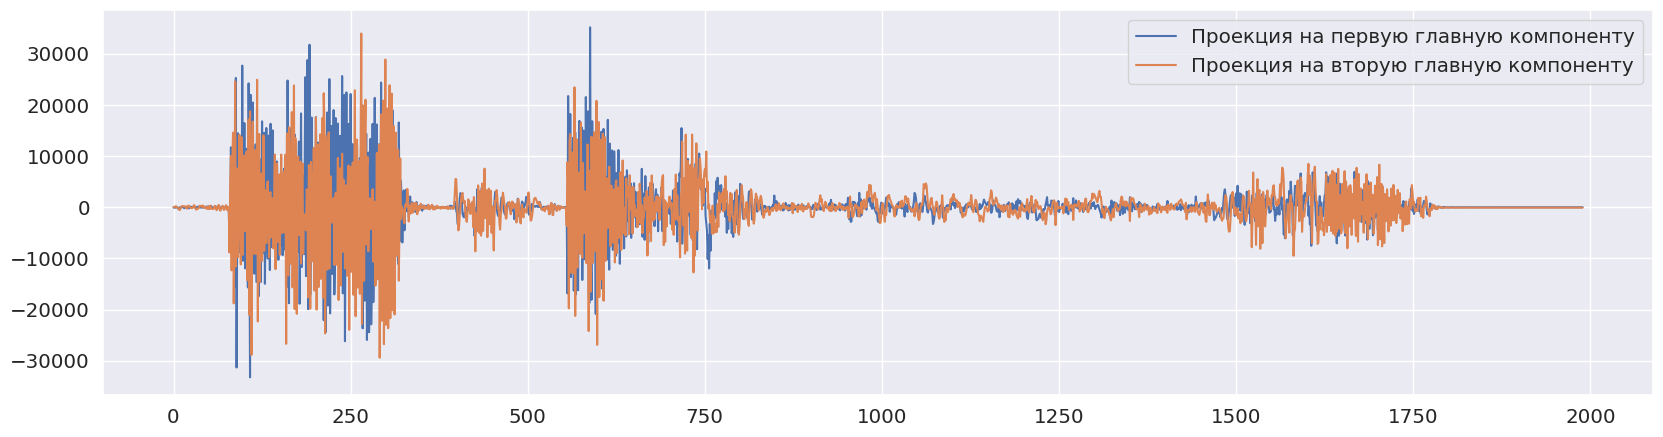

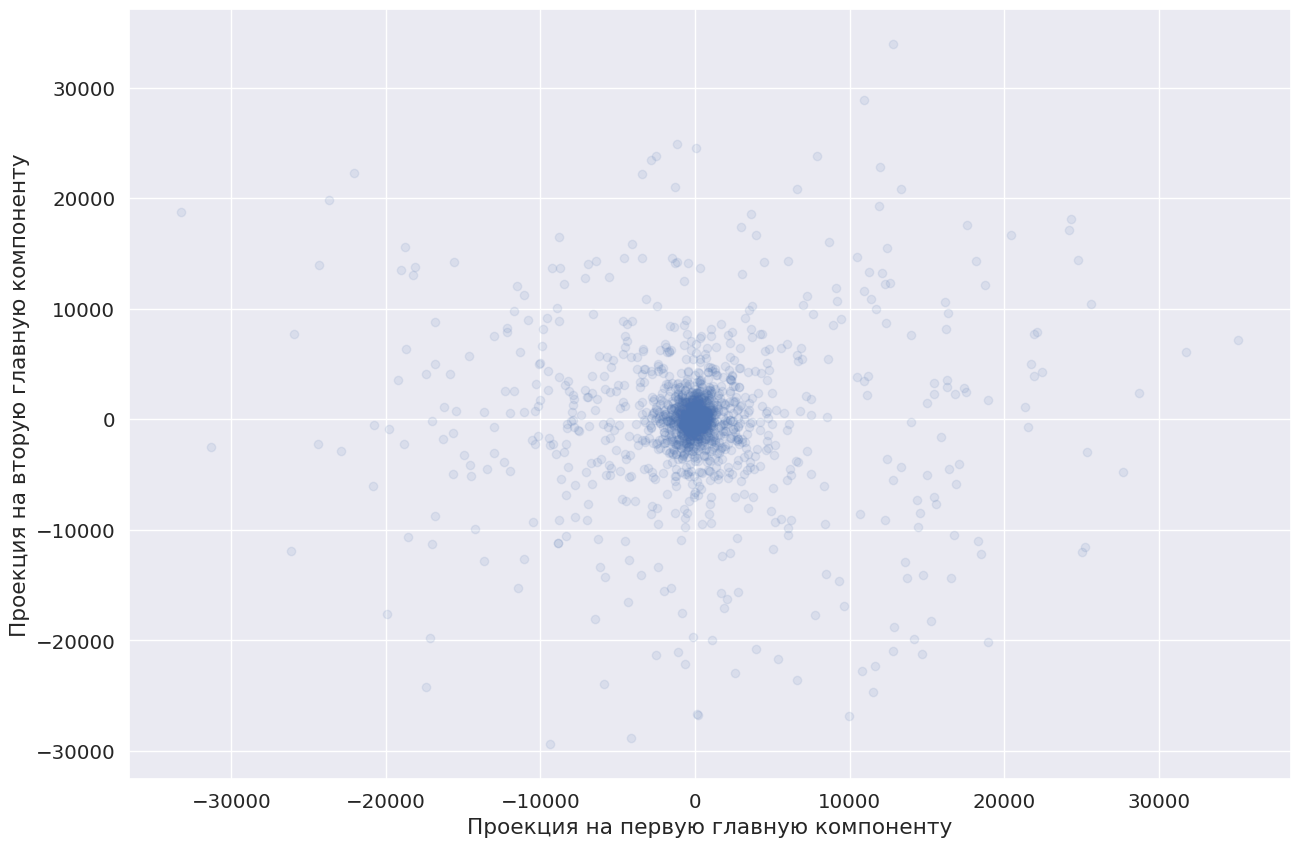

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

# Создадим объект класса PCA с числом компонент, равным 10
# (уменьшили количество признаков в 100 раз)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 10)
(1990, 1000)


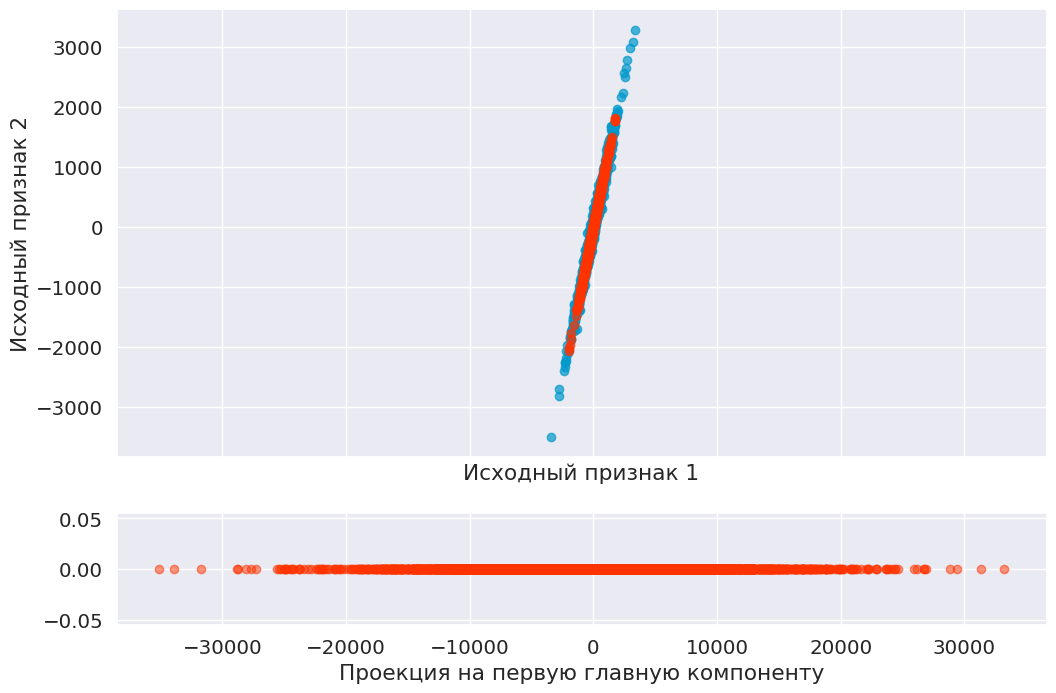

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 10 (уменьшили количество признаков в 100 раз)
pca = PCA(n_components=10)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=10
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y

axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

(1990, 10)


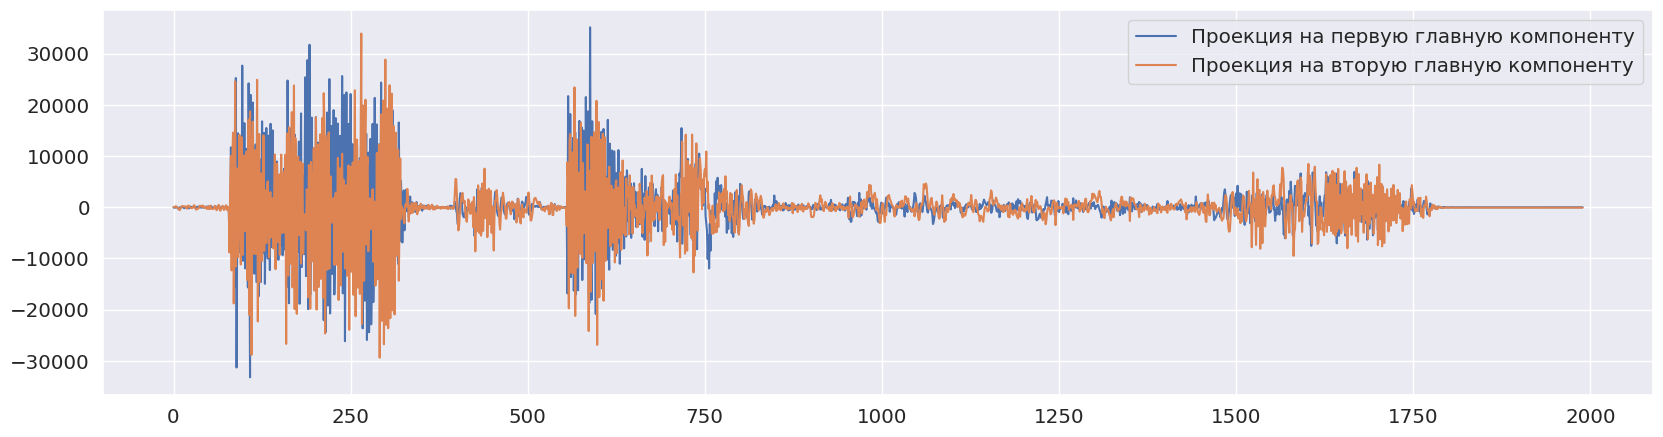

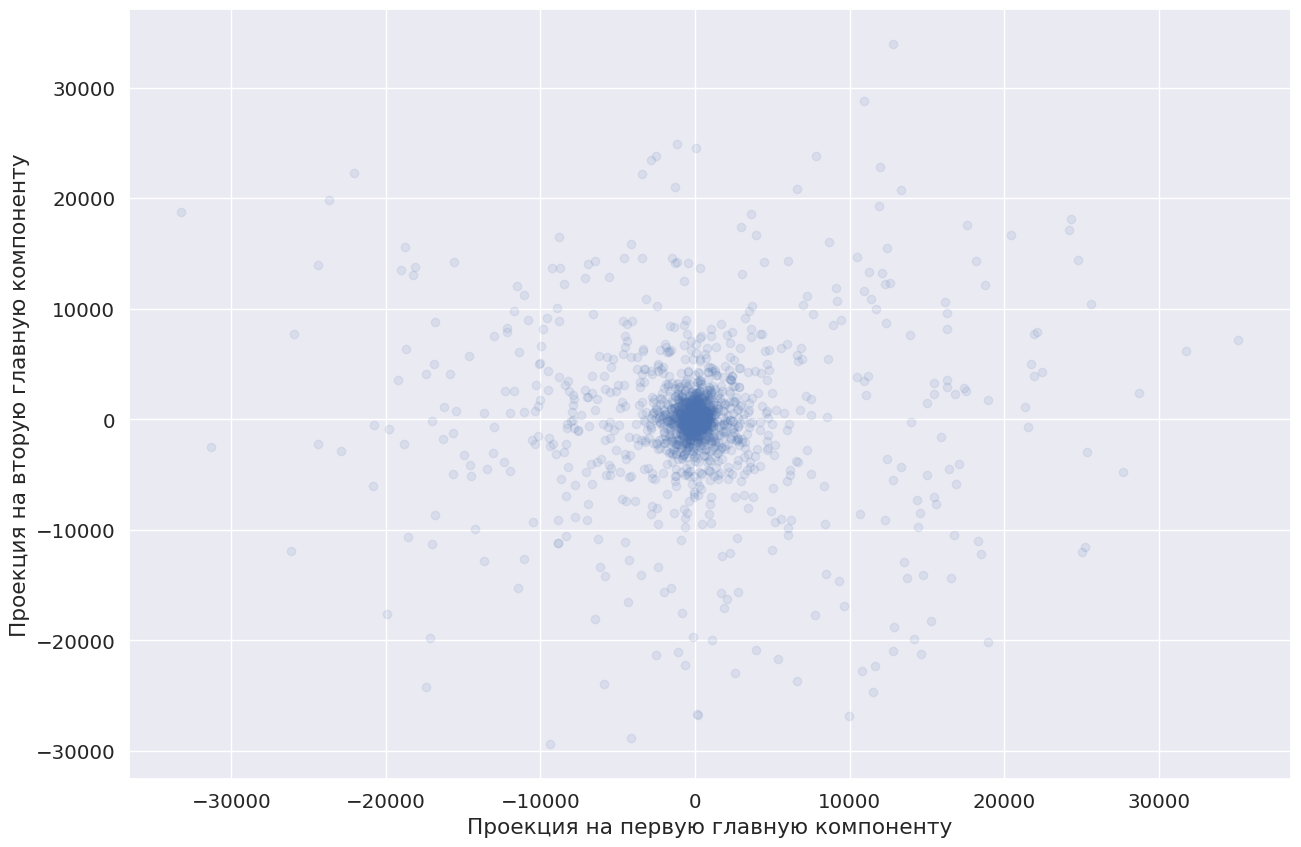

In [ ]:
print(Y.shape)
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

#Создадим объект класса PCA с числом компонент, равным 5
# (уменьшили количество признаков в 200 раз)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 5)
(1990, 1000)


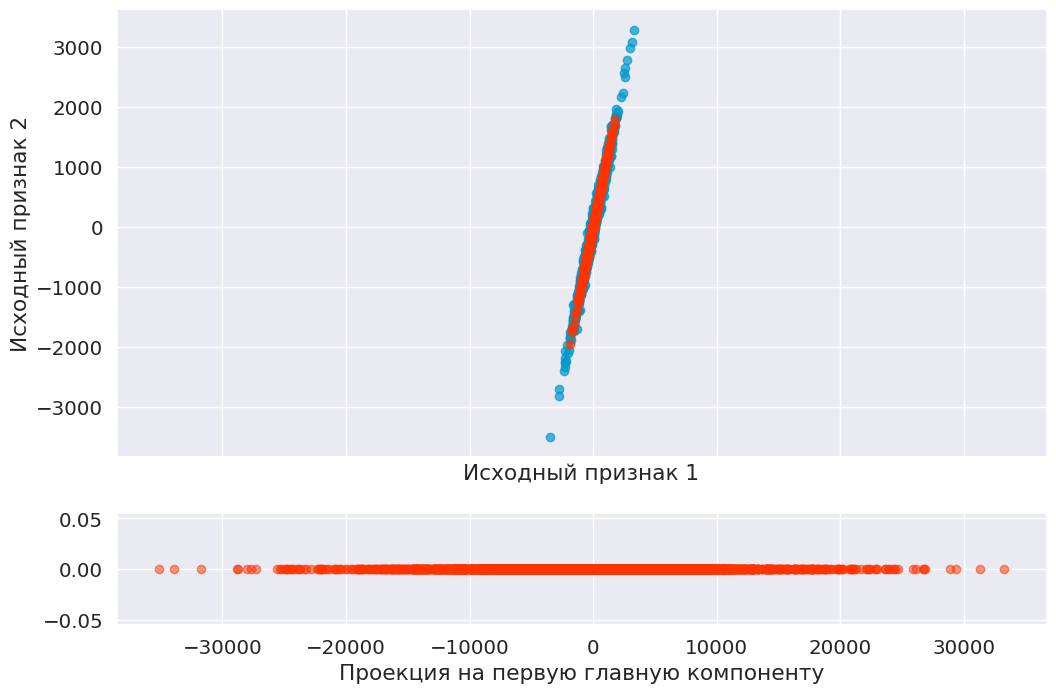

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 5 (уменьшили количество признаков в 200 раз)
pca = PCA(n_components=5)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=5
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y

axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

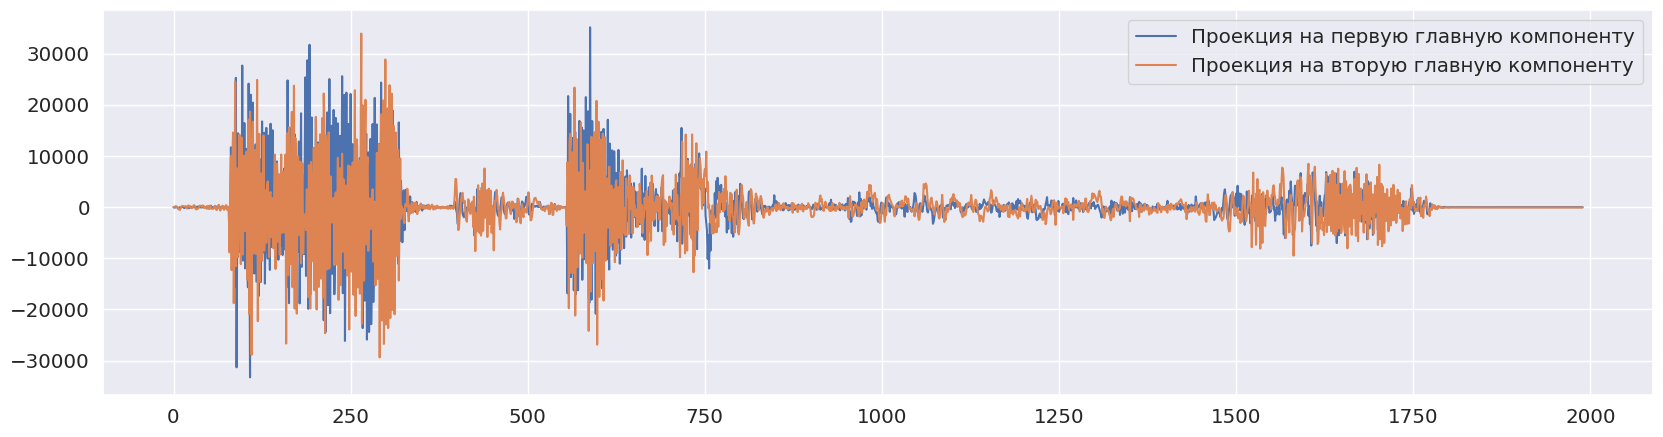

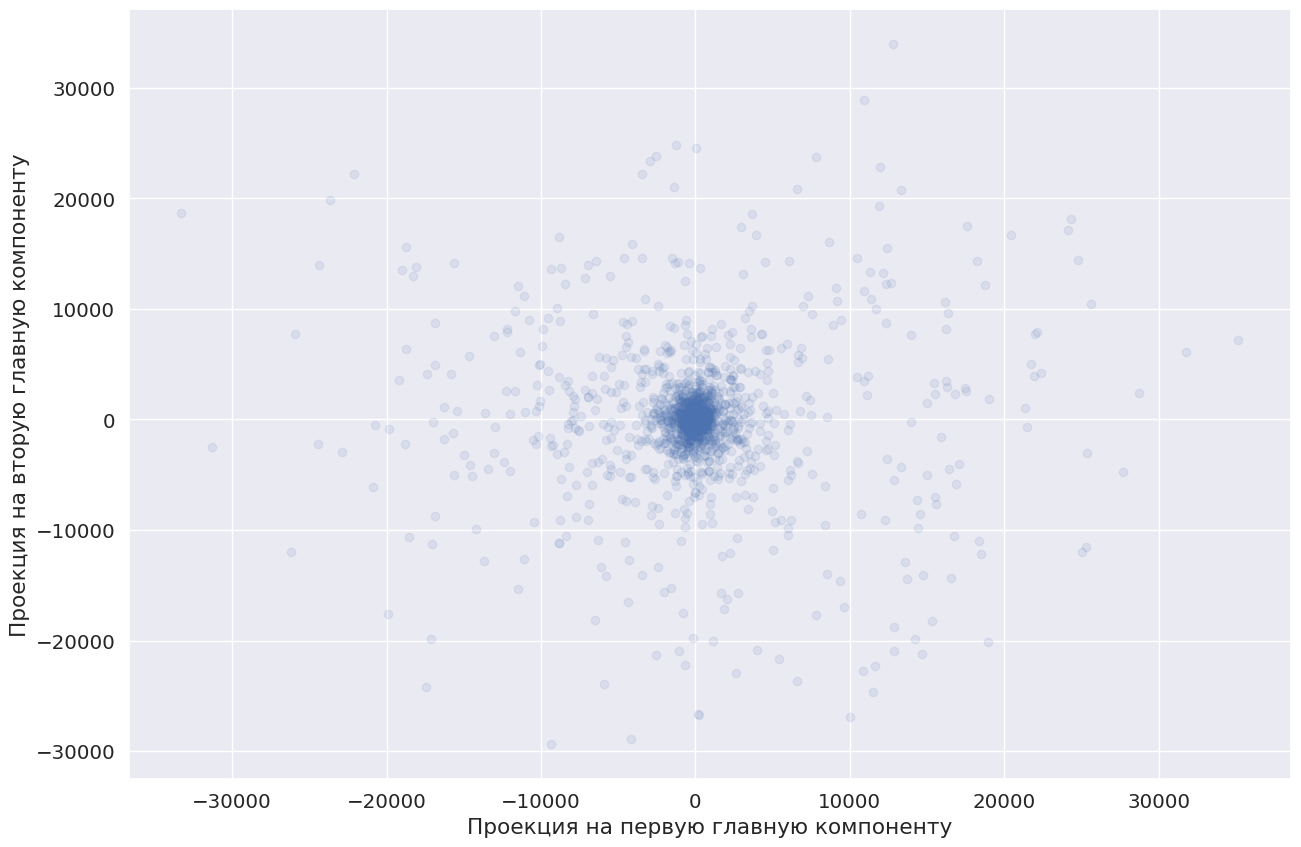

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()


2. Постройте сами две главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

    То есть необходимо применить метод PCA к нашей матрице с числом компонент, равным 2 (тем самым получив датасет с 2 "признаками"). Это позволит нам отрисовать данные на плоскости, чтобы попытаться уловить зависимости.

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
(1990, 1000)
(1990, 2)
(1990, 1000)


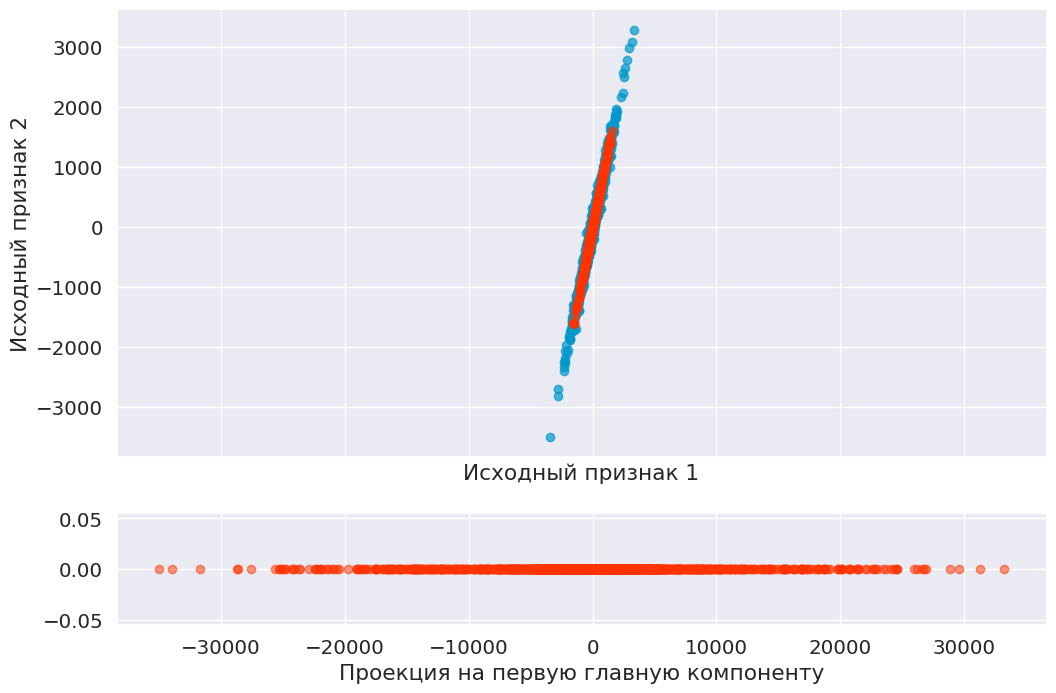

In [ ]:
X = mono_sound_to_cut_1
print(X)
# Создадим объект класса PCA с числом компонент, равным 2
pca = PCA(n_components=2)
# Обучим и преобразуем нашу матрицу X при помощи метода fit_transform
Y = pca.fit_transform(X)
# Преобразуем наши данные в исходнрый размер при помощи метода inverse_transform
# Это можно понять следующий образом: если SVD возвращает U, S, V и U@S -- это PCA преобразование
# То множение еще и на V, то это обратное преобразование

X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
n_comp=2
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Отрисуем точки, поспользовавшись первой колонкой матрицы X как координатами точек по оси х
# и второй колонкой как координатами точек по оси y
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
# Аналогично с преобразованной матрицей X_hat
axes[0].scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)

axes[0].set_xlabel('Исходный признак 1')
axes[0].set_ylabel('Исходный признак 2')

# Отрисуем распределения точек вдоль главной компоненты, передав в качестве координат по оси x вектор -Y

axes[1].scatter(-Y, np.zeros(len(Y)*n_comp), alpha=0.5, color=red)

axes[1].set_xlabel('Проекция на первую главную компоненту')

plt.show()

(1990, 2)


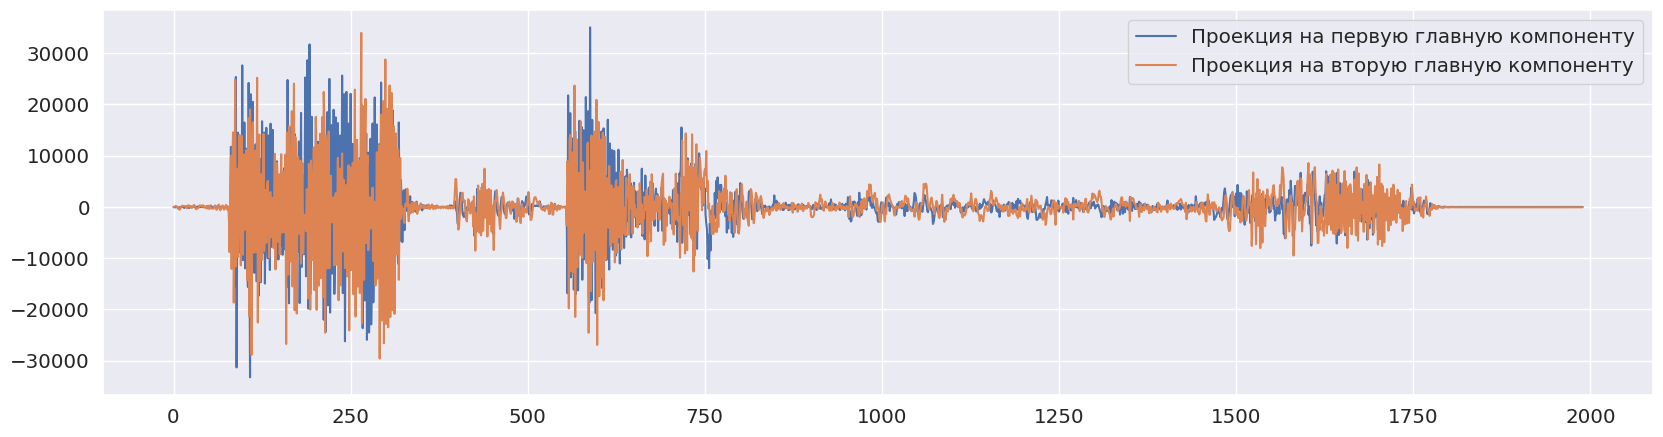

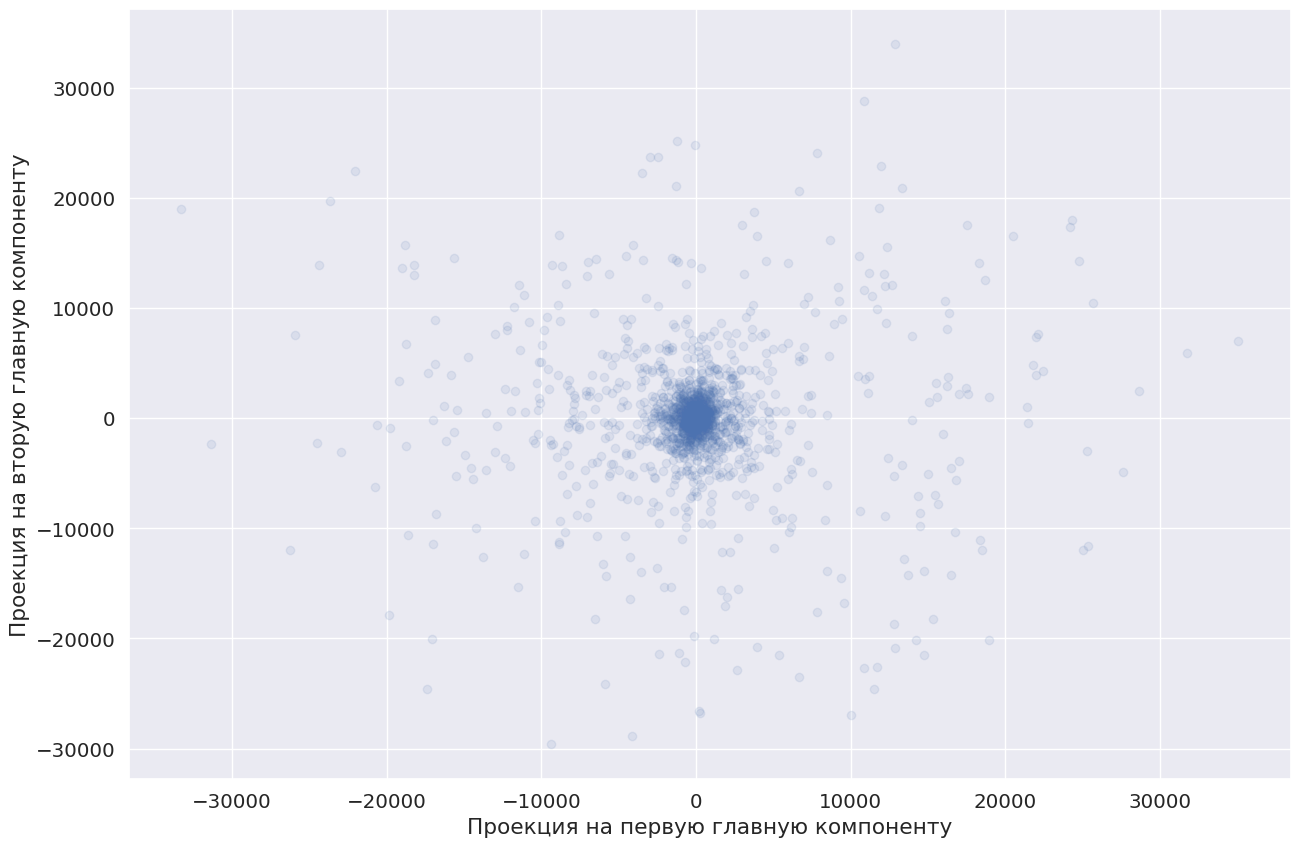

In [ ]:
print(Y.shape)
plt.figure(figsize=(20,5))
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Проекция на первую главную компоненту','Проекция на вторую главную компоненту'])
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

3. Постройте scatter plot датасета в пространстве первых двух компонент, а третью используйте как цвет.
    То есть необходимо применить метод PCA уже с 3 компонентами и нарисовать опять точки, только передав третью компоненту в качестве цвета. (мы также делали на семинаре с картинкой)

[[  0.   -1.   -1.  ...  88.5  58.5  18. ]
 [-25.5 -61.5 -81.5 ...  30.5 -20.5 -53. ]
 [-67.5 -65.5 -50.  ... 118.5 118.5  86.5]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]


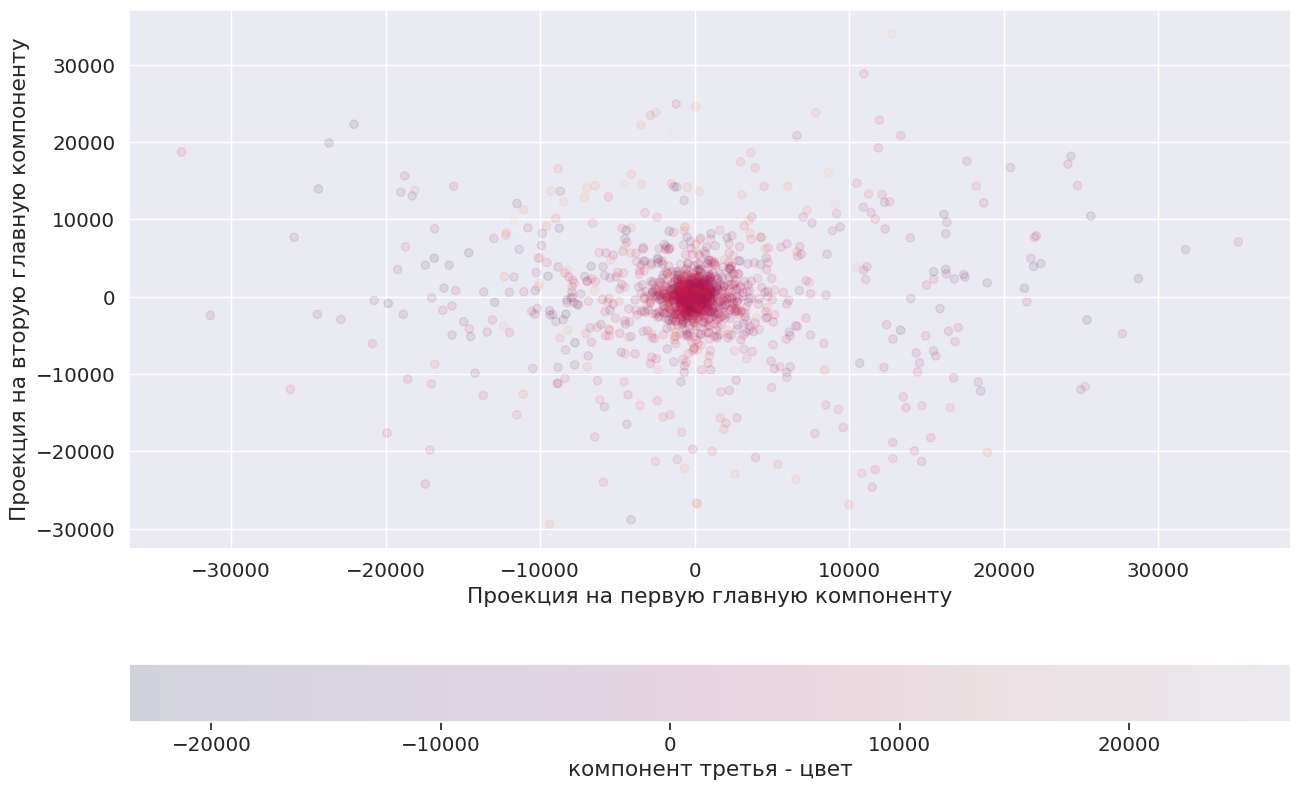

In [ ]:
# Ваше решение здесь
 # Применение PCA
X = mono_sound_to_cut_1
print(X)
pca = PCA(n_components=3)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)
plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], c=Y[:, 2], alpha=0.1)
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
# plt.title('Проекция на первые три компоненты (третья - цвет)')
plt.colorbar(label='компонент третья - цвет',orientation='horizontal')
plt.show()

#### Задание 3

Нам осталось заняться непосредственно "сжатием" звука и проверкой правильности наших действий.

1. Выполните обратное PCA преобразование сжатых данных и получите "матрицу" с сжатым звуком.

    Воспользуйтесь обратным преобразованием PCA (inverse_transform), чтобы из матрицы размера `(число объектов, число компонент)` перейти в матрицу размера `(число объектов, 1000)`.

In [ ]:
# Ваше решение здесь

 # Применение PCA
X = mono_sound_to_cut_1
# print(X)
pca = PCA(n_components=50)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)


(1990, 1000)
(1990, 50)
(1990, 1000)


2. Преобразуйте "матрицу", получившуюся обратным преобразованием, в сигнал (одномерный массив, наш "сжатый" монозвук), и послушайте результат `(Audio(YOUR_RESULT, rate = samplerate)`.

    Воспользуйтесь функцией, которую написали в первом задании, чтобы преобразовать матрицу с "сжатым" звуком (размер после обратного преобразования должен быть такой же, как и у оригинальной матрицы) в вектор-сигнал, который уже можно будет прослушать. Если звук похож на оригинал, то вы все сделали правильно!

In [ ]:
# Ваше решение здесь

print(X_hat.shape)
mono_sound_2 = X_hat.reshape(1990000,)
print(mono_sound_2.shape)
# Давайте послушаем

Audio(mono_sound_2, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

Вывод: звук похож на оригинал в 1 канале записи (монозвук). Проверку выполнил на 50 компонентах. Слышны посторонние звуки и щелчки, но звук напоминает оригинал.  

3. Исследуйте зависимость качества звука от числа компонент. Подберите "на слух" минимальное число компонент, при котором звук практически не отличается от оригинала.

    Добавьте в ячейки два варианта звуковой дорожки -- оригинальную и выбранную вами. Укажите какое число компонент вы оставили.

Подсказка! попробуйте отфильтровать сигнал с помощью функции `gaussian_filter1d` из `scipy.ndimage`. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - `Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)`

In [ ]:
mono_sound_1

array([ 0., -1., -1., ...,  0.,  0.,  0.])

In [ ]:
X = mono_sound_to_cut_1
X.shape

(1990, 1000)

In [ ]:
# Ваше решение здесь
# звуковая дорожка оригинальная
Audio(mono_sound_1, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Звуковая дорожка сжатая до 200 компонент без фильтрации
X = mono_sound_to_cut_1
# print(X)
pca = PCA(n_components=200)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
mono_sound_3 = X_hat.reshape(1990000,)
print(mono_sound_3.shape)
# Давайте послушаем
Audio(mono_sound_3, rate = samplerate)
# Audio(gaussian_filter1d(mono_sound_3, 2), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Звуковая дорожка сжатая до 200 компонент с фильтрацией
X = mono_sound_to_cut_1
# print(X)
pca = PCA(n_components=200)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)
# Выведем размеры матриц X, Y и X_hat
print(X.shape)
print(Y.shape)
print(X_hat.shape)
mono_sound_3 = X_hat.reshape(1990000,)
print(mono_sound_3.shape)
# Давайте послушаем
# звуковая дорожка с числом компонет 200 с фильтрацией
Audio(gaussian_filter1d(mono_sound_3, 2), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.


3.1   Ответьте на вопросы:
- Количество компонент, которое вы выбрали это много или мало?

Вывод: количество компонет оставил 200. Так как при дальнейшем уменьшении компонет больше становится щелчков и посторонних шумов. Даже после фильтрации слышны посторонные шумы остаются и звук становится более "глухим" на высоких частотах. Также зависит прослушивание звука на каких динамиках, наушниках или сложной системе мы проверяли сжатие звука (можно было и оставить 95-100 компонет при простых динамиках). Проверка на слух, подбирал по ощущениям.

- Как сильно можно сжать звук таким образом?





Мы обнаружили, что количество измерений можно уменьшить с 1000 до 52, сохранив при этом 95% его дисперсии. Следовательно, размер сжатого датасета теперь составляет 5,2% от исходного размера. Если мы хотим сохранить 99% дисперсии, количество измерений можно уменьшить до 95, т.е. до 9.5% от исходного размера.

In [ ]:
# Ваше решение здесь
from scipy.io.wavfile import write

In [ ]:
# Как сильно можно сжать звук таким образом?

write("Beethoven_1.wav", samplerate, mono_sound_1.astype(np.int16))
print("Размер оригинального файла", os.path.getsize('Beethoven_1.wav'))

Размер оригинального файла 3980044


In [ ]:
write("Beethoven_2.wav", samplerate, mono_sound_3.astype(np.int16))
print("Размер сжатого файла", os.path.getsize('Beethoven_2.wav'))

Размер сжатого файла 3980044


- А если нам дадут другую звуковую дорожку, нам надо сделать то же самое, чтобы сжать звук, как автоматически подобрать число компонент и возможно ли это?

Вывод:
Хорошей стратегией является выбор количества измерений, для которых совокупная объясненная дисперсия превышает пороговое значение, например 0,95 (95%).
PCA может принимать параметр для количества компонет - 0.95,
означает, что PCA выбирает минимальное количество основных компонет таким образом, что 95% дисперсии сохранилось

In [ ]:

pca= PCA(n_components=0.95, svd_solver='full')
Y=pca.fit_transform(X)
X_hat=pca.inverse_transform(Y)
mono_sound_4 = X_hat.reshape(-1)
print(mono_sound_4)
print(X.shape)
print(Y.shape)
print(X_hat.shape)
Audio(mono_sound_4, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# звуковая дорожка с числом компонет 52 (95%) с фильтрацией
Audio(gaussian_filter1d(mono_sound_4, 2), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

4. (доп задание)

  a) Оберните получившийся код по сжатию звука в одну или несколько функций

  b) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в задании 1.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

  d) Что степень сжатия означает для PCA? Для большой аудиозаписи (3 мин, например) мы хотели бы разбить на большее, меньшее или такое же число отрезков как и для предложенной аудиозаписи? Почему?

  c) Можно ли как-то автоматически подобрать степерь сжатия? За что она отвечает в нашей задаче. Как степень сжатия влияет на звук? Почему она так влияет на звук?



In [ ]:
# Ваше решение здесь

In [ ]:
def pca_audio(data_sound, components):
  pca = PCA(n_components = components)
  Y = pca.fit_transform(data_sound)
  X_hat = pca.inverse_transform(Y)
  return X_hat, components

X_compress, components = pca_audio(X, 100)
print(f'количество компонет:{components}')
Audio(X_compress.reshape(-1), rate = samplerate)
# # звуковая дорожка с фильтрацией
# Audio(gaussian_filter1d(X_compress.reshape(-1), 2), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.